# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0383 Позолотин Константин и Смирнов Иван. Вариант №18.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

* Формула прямоугольников:
$$y_{n+1} = y_n + s_{n + {\frac{1}{2}}}, y_0 = 0$$
* Формула трапеций:
$$y_{n+1}=y_n+\frac{1}{2}(s_n + s_{n+1}), y_0 = 0$$
* Формула Симпсона:
$$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1}+4s_n+s_{n+1}), y_0 = 0$$

* Формула интегрирование «по правилу 3/8»:
$$y_{n+2}=y_{n-1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1})$$

## Постановка задачи
Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\hat{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

#### 1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Формулы для передаточных функции рекурсивных фильтров:
* Формула прямоугольников:
$\tilde{H}(f) = \frac{1}{2i sin(\pi f)}$

Вывод передаточной функции фильтра, использующего формулу прямоугольника:

$ Y(f) = X(f) \cdot \frac{1}{2i sin(\pi f)} $

где $Y(f)$ - преобразование Фурье выходного сигнала, $X(f)$ - преобразование Фурье входного сигнала, $f$ - частота.

Определение передаточной функции $H_{\text{rect}}(f)$ как отношение преобразования выходного сигнала к преобразованию входного:

$ H_{\text{rect}}(f) = \frac{Y(f)}{X(f)} = \frac{\frac{1}{2i sin(\pi f)}}{1} $

Упрощение выражения:

$ H_{\text{rect}}(f) = \frac{1}{2i sin(\pi f)} $

В терминах синуса:

$ H_{\text{rect}}(f) = \frac{1}{2i sin(\pi f)} \cdot \frac{\sin(\pi)}{\sin(\pi)} $

$ H_{\text{rect}}(f) = \frac{1}{2i sin(\pi f)} $

Передаточная функция для фильтра, использующего формулу прямоугольника, в терминах синусов и косинусов:

$ H_{\text{rect}}(f) = \frac{1}{2i sin(\pi f)} $



In [2]:
def pr_1(f):
    return (1 / (2j * np.sin(np.pi * f))).imag

def pr_2(f):
    return np.pi * f / np.sin(np.pi * f)

* Формула трапеций:
$\tilde{H}(f) = \frac{cos(\pi f)}{2i sin(\pi f)}$

Вывод передаточной функции фильтра, использующего формулу трапеции:

$Y(f) = X(f) \cdot \frac{\cos(\pi f)}{2i\sin(\pi f)} $

где $Y(f)$ - преобразование Фурье выходного сигнала, $X(f)$ - преобразование Фурье входного сигнала, $f$ - частота.

Определение передаточной функции $H_{\text{trapezoid}}(f)$ как отношение преобразования выходного сигнала к преобразованию входного:

$ H_{\text{trapezoid}}(f) = \frac{Y(f)}{X(f)} = \frac{\frac{\cos(\pi f)}{2i\sin(\pi f)}}{1} $

Упрощение выражение:

$ H_{\text{trapezoid}}(f) = \frac{\cos(\pi f)}{2i\sin(\pi f)} $

В терминах синуса:

$ H_{\text{trapezoid}}(f) = \frac{\cos(\pi f)}{2i\sin(\pi f)} \cdot \frac{\sin(\pi)}{\sin(\pi)} $

$ H_{\text{trapezoid}}(f) = \frac{\cos(\pi f)}{2i\sin(\pi f)} $

Передаточная функция для фильтра, использующего формулу трапеции, в терминах синусов и косинусов:

$ H_{\text{trapezoid}}(f) = \frac{\cos(\pi f)}{2i\sin(\pi f)} $

In [3]:
def trap1(f):
    return (np.cos(np.pi * f) / (2j * np.sin(np.pi * f))).imag

def trap2(f):
    return np.cos(np.pi * f) * (np.pi * f / np.sin(f * np.pi))

* Формула Симпсона:
$\tilde{H}(f) = \frac{cos(2\pi f) + 2}{3i sin(2\pi f)}$

Вывод передаточной функции фильтра, использующего формулу Симпсона:

$ Y(f) = X(f) \cdot \frac{\cos(2\pi f) + 2}{3i\sin(2\pi f)} $

где $Y(f)$ - преобразование Фурье выходного сигнала, $X(f)$ - преобразование Фурье входного сигнала, $f$ - частота.

Определение передаточной функции $H_{\text{Simpson}}(f)$ как отношение преобразования выходного сигнала к преобразованию входного:

$ H_{\text{Simpson}}(f) = \frac{Y(f)}{X(f)} = \frac{\frac{\cos(2\pi f) + 2}{3i\sin(2\pi f)}}{1} $

Упрощение выражения:

$ H_{\text{Simpson}}(f) = \frac{\cos(2\pi f) + 2}{3i\sin(2\pi f)} $

Передаточная функция для фильтра, использующего формулу Симпсона, в терминах синусов и косинусов:

$ H_{\text{Simpson}}(f) = \frac{\cos(2\pi f) + 2}{3i\sin(2\pi f)} $



In [4]:
def simpson1(f):
    return ((np.cos(2 * np.pi * f) + 2) / (3j * np.sin(2 * np.pi * f))).imag

def simpson2(f):
    return ((np.cos(2 * np.pi * f) + 2) / 3) * ((2 * np.pi * f) / (np.sin(2 * np.pi * f)))

Передаточные функции, соответствующие квадратурным формулам:

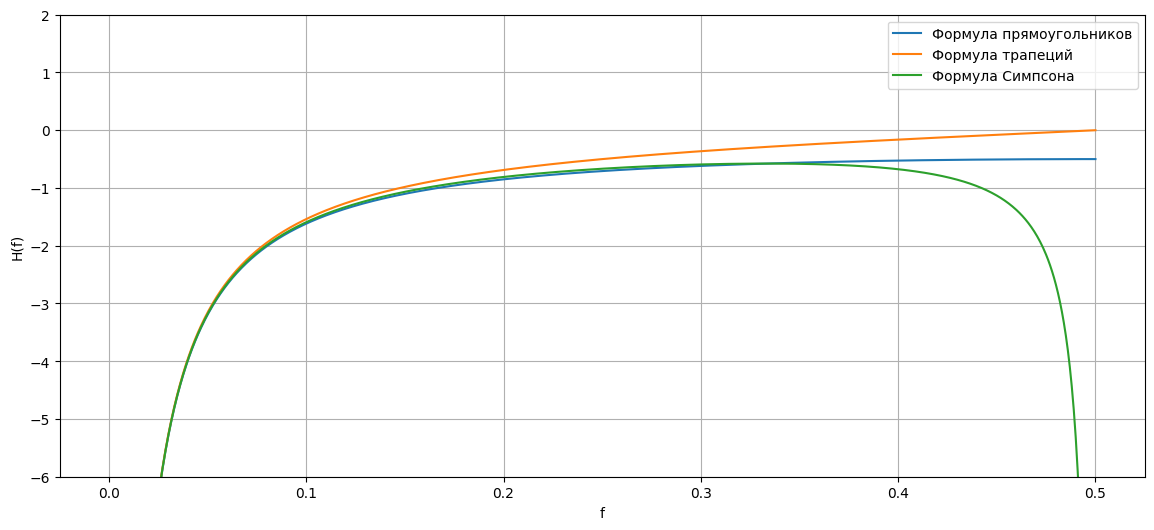

In [5]:
list = np.linspace(0.0001, 0.5, 1000)

plt.figure(figsize=(14, 6))
plt.ylim((-6, 2))
plt.plot(list, pr_1(list), label="Формула прямоугольников")
plt.plot(list, trap1(list), label="Формула трапеций")
plt.plot(list, simpson1(list), label="Формула Симпсона")
plt.ylabel("H(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()


Отношения вычисляемого в результате фильтрации значения к истинному:

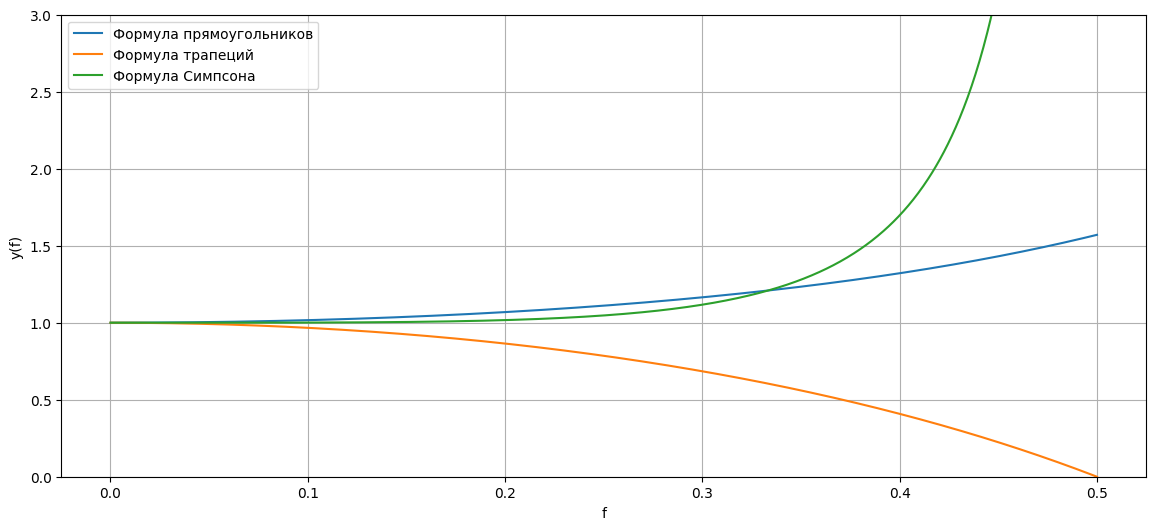

In [6]:
plt.figure(figsize=(14, 6))
plt.ylim((0, 3))
plt.plot(list, pr_2(list), label="Формула прямоугольников")
plt.plot(list, trap2(list), label="Формула трапеций")
plt.plot(list, simpson2(list), label="Формула Симпсона")
plt.ylabel("y(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

Исходя из данных графиков, можно сделать вывод, что рекурсивный фильтр, построенный на базе формулы трапеций, эффективно подавляет высокочастотные составляющие, в то время как квадратурные формулы прямоугольников и Симпсона, применяемые в рекурсивных фильтрах, склонны к усилению высоких частот.

#### 2. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:
#### $ y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1}) $
#### Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

Вывод передаточной функции для метода интегрирования по правилу 3/8.

$ y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1}) $

Представим $ y_{n+2} $ в комплексной форме:

$ y_{n+2} = H(\omega)e^{i\omega (n-1)} + \frac{e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)} }{8} $

Выразим $ y_{n+2} $ как $ H(\omega)e^{i\omega (n+2)} $:

$ H(\omega)e^{i\omega (n+2)} = H(\omega)e^{i\omega (n-1)} + \frac{e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)} }{8} $

Путем упрощения и дальнейших преобразований:

$ H(\omega) = \frac{e^{2i\omega} + 3e^{i\omega} + e + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})} \cdot \frac{e^{-\frac{i\omega}{2}}}{e^{-\frac{i\omega}{2}}} $

Это дает следующий вид для передаточной функции:

$ H(\omega) = \frac{2\cos\left(\frac{3\omega}{2}\right) + 6\cos\left(\frac{\omega}{2}\right)}{16i\sin\left(\frac{3\omega}{2}\right)} $

В частотной области:

$ \tilde{H}(f) = \frac{\cos(3\pi f) + 3\cos(\pi f)}{8i \sin(3\pi f)} $



In [7]:
def H4(f):
    return ((np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) / (8j * np.sin(3 * np.pi * f))).imag

def y4(f):
    return (1 / 12) * (np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) * ((3 * np.pi * f) / np.sin(3 * np.pi * f))


Передаточная функция, соответствующая формуле 3/8

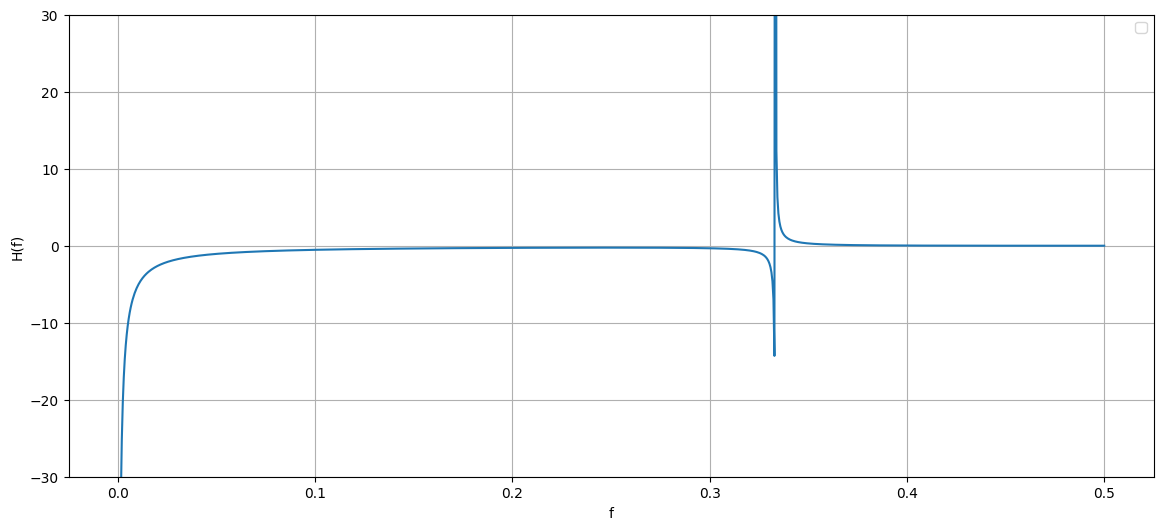

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(list, H4(list))
plt.ylim((-30, 30))
plt.ylabel("H(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()


Отношения вычисляемого в результате фильтрации значения к истинному

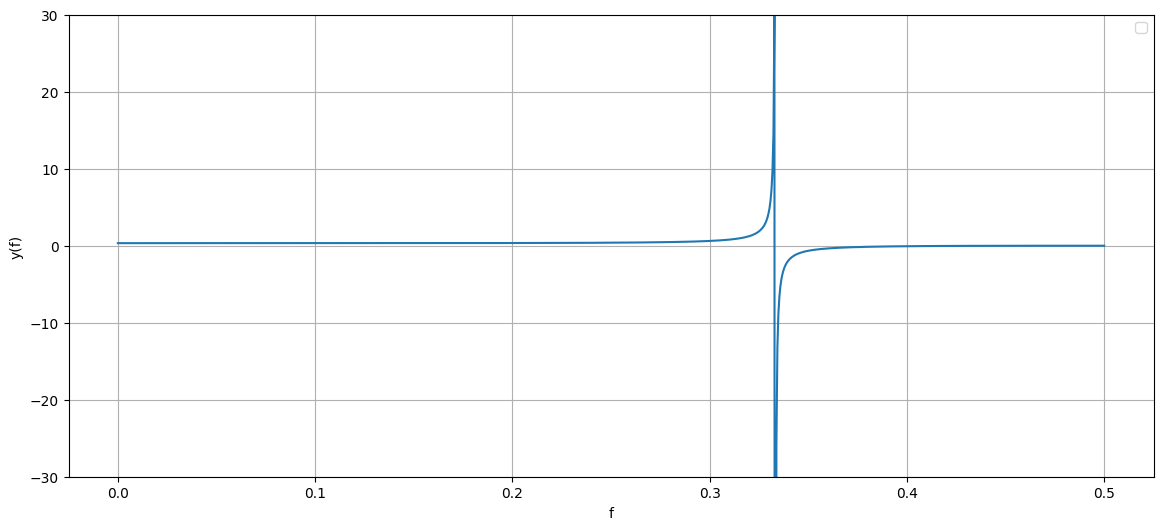

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(list, y4(list))
plt.ylim((-30, 30))
plt.ylabel("y(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

#### 3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

При анализе графиков частотных характеристик становится понятно, что рекурсивные фильтры, построенные на основе квадратурной формулы трапеций, демонстрируют эффективное подавление высоких частот. В то время как рекурсивные фильтры, использующие квадратурные формулы прямоугольников и Симпсона, наоборот, проявляют тенденцию к усилению высокочастотных компонент.

## Выводы

В ходе выполнения практической работы был осуществлен обзор частотных характеристик известных методов численного интегрирования. В результате данного анализа были выведены формулы для передаточных функций рекурсивных фильтров, соответствующих методам интегрирования, таким как формулы прямоугольников, трапеций, Симпсона и правила 3/8. Созданы визуализации, иллюстрирующие передаточные функции этих фильтров и взаимосвязь между результатами фильтрации и точными значениями. Путем анализа этих графиков были изучены частотные характеристики передаточных функций, а также проведено сравнение их частотных свойств.